### Importing required python modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
# from pysolar.solar import *
import datetime
import pytz
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import seaborn as sns
import folium
import folium.plugins as plugins
%matplotlib inline


# Exploratory Data Analysis (EDA):

In [2]:
d_wssolschlmrks = pd.read_csv('data_with_WSigLmrkSol.csv')
d_wssolschlmrks.head()

Unnamed: 0                 Time                 Date  year  month  day  \
0           0  2017-11-17 14:00:00  2017-11-17 00:00:00  2017     11   17   
1           1  2017-11-17 14:00:00  2017-11-17 00:00:00  2017     11   17   
2           2  2018-06-13 00:00:00  2018-06-13 00:00:00  2018      6   13   
3           3  2018-06-13 19:00:00  2018-06-13 00:00:00  2018      6   13   
4           4  2018-06-13 22:00:00  2018-06-13 00:00:00  2018      6   13   

   hour  DayOfWeek  DayOfYear Holiday  ...  humidity  windSpeed Signals  \
0    14          4        321       0  ...      0.61       6.35      64   
1    14          4        321       0  ...      0.61       6.35      64   
2     0          2        164       0  ...      0.78       5.89      64   
3    19          2        164       0  ...      0.39       6.40      64   
4    22          2        164       0  ...      0.52       8.21      64   

  Schools  Landmarks  Solar_inclination  temperature  dewPoint  \
0      31          2          34.696357        81.96     67.03   
1      31          2          34.696551        81.96     67.03   
2      31          2         -32.236190        78.17     70.85   
3      31          2          17.941989        90.94     62.30   
4      31          2         -16.301790        84.30     64.74   

   Issue Reported  Accident  
0    Crash Urgent         1  
1   Crash Service         1  
2    Crash Urgent         1  
3    Crash Urgent         1  
4    Crash Urgent         1  

[5 rows x 26 columns]

#### Number of Accidents on each day of week

/Users/rameshadhikari/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


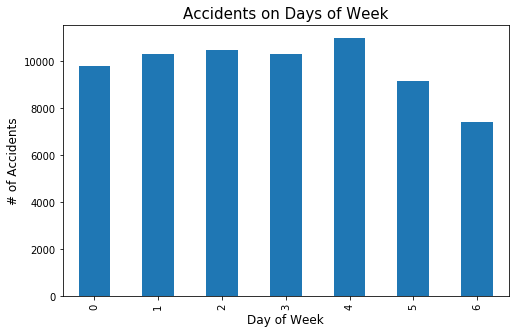

In [37]:
d_wssolschlmrks.groupby(
    'DayOfWeek').sum()['Accident'].plot('bar', figsize=(8, 5))
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('# of Accidents', fontsize=12)
plt.title('Accidents on Days of Week', fontsize=15)
plt.savefig('Accident_DayOfWeek.pdf', bbox_inches='tight')


#### Total number of accidents agains number of nearby landmarks

/Users/rameshadhikari/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


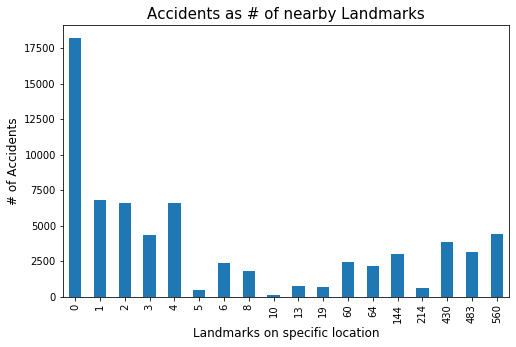

In [8]:
d_wssolschlmrks.groupby(
     'Landmarks').sum()['Accident'].plot('bar', figsize=(8, 5))
plt.xlabel('Landmarks on specific location', fontsize=12)
plt.ylabel('# of Accidents', fontsize=12)
plt.title('Accidents as # of nearby Landmarks', fontsize=15)
plt.savefig('Accident_Landmarks.pdf', bbox_inches='tight')

#### Number of Accidents against number of school zones

/Users/rameshadhikari/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


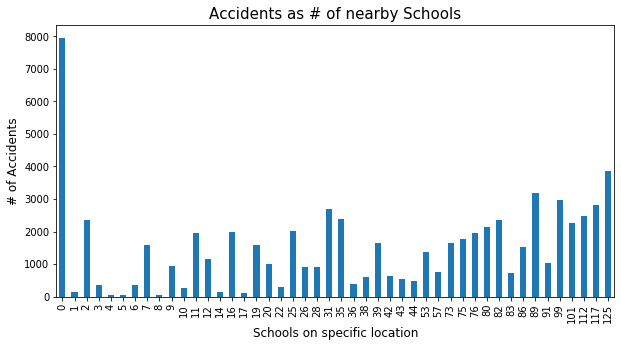

In [9]:
d_wssolschlmrks.groupby(
     'Schools').sum()['Accident'].plot('bar', figsize=(10, 5))
plt.xlabel('Schools on specific location', fontsize=12)
plt.ylabel('# of Accidents', fontsize=12)
plt.title('Accidents as # of nearby Schools', fontsize=15)
plt.savefig('Accident_Schools.pdf', bbox_inches='tight')

####  Number of Accidents on US holidays

/Users/rameshadhikari/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


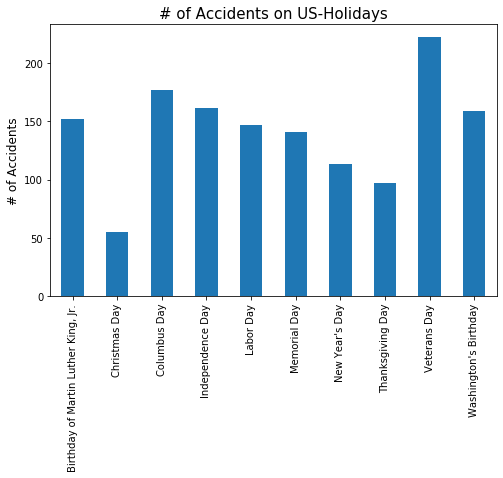

In [10]:
d_wssolschlmrks.groupby(
     'Holiday').sum()['Accident'].drop('0').plot('bar', figsize=(8, 5))
plt.xlabel('')
plt.ylabel('# of Accidents', fontsize=12)
plt.title('# of Accidents on US-Holidays', fontsize=15)
plt.savefig('Accident_Holiday.pdf', bbox_inches='tight')

#### Number of Accidents at specific locations

/Users/rameshadhikari/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


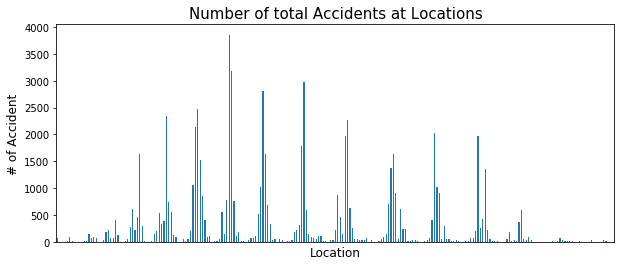

In [11]:
fig, ax = plt.subplots(1)
d_wssolschlmrks.groupby([
     'Location']).count()['Accident'].plot('bar', figsize=(10, 4))
plt.ylabel('# of Accident', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
# ax.set_yticklabels([])
plt.title('Number of total Accidents at Locations', fontsize=15)
plt.savefig('Accident_location.pdf', bbox_inches='tight')

#### Hourly total accidents

/Users/rameshadhikari/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


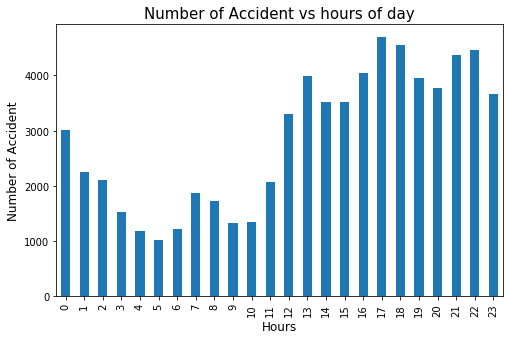

In [12]:
d_wssolschlmrks.groupby('hour').sum()[
     'Accident'].plot('bar', figsize=(8, 5))
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Number of Accident', fontsize=12)
plt.title('Number of Accident vs hours of day', fontsize=15)
plt.savefig('Accident_hourly.pdf', bbox_inches='tight')

/Users/rameshadhikari/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


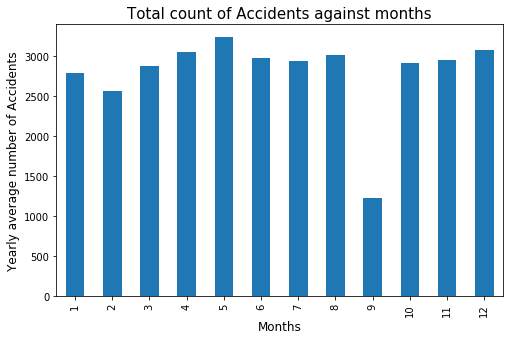

In [164]:
d_wssolschlmrks.groupby(['year','month']).sum() \
        ['Accident'].groupby('month').mean().plot('bar', figsize=(8, 5))
plt.xlabel('Months', fontsize=12)
plt.ylabel('Yearly average number of Accidents', fontsize=12)
plt.title('Total count of Accidents against months', fontsize=15)
plt.savefig('Accident_monthly.pdf', bbox_inches='tight')


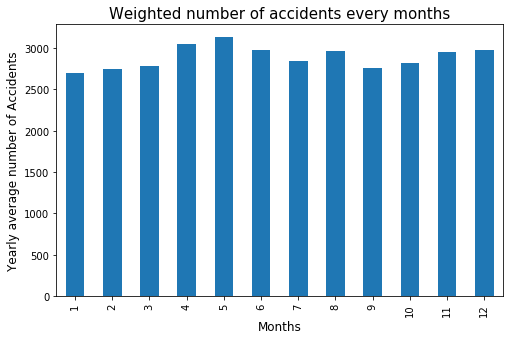

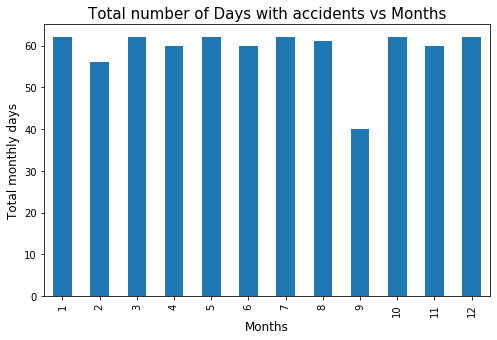

In [189]:
d_monthly = d_wssolschlmrks.groupby(['Date', 'month']).sum()['Accident']
d_month = d_monthly.groupby('month').sum()
d_month_a = d_month.array
d_mont_a = d_monthly.groupby('month').size().array
month_avg = []
for i in range(len(d_mont_a)):
    month_avg.append((i+1, (30*d_month_a[i]/d_mont_a[i]), d_mont_a[i]))
dmonth_AVG = pd.DataFrame(month_avg, columns=['month', 'Accidents', 'Days_on_month'])
dmonth_AVG.plot.bar(x='month', y='Accidents', figsize=(8, 5), legend=False)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Yearly average number of Accidents', fontsize=12)
plt.title('Weighted number of accidents every months', fontsize=15)
plt.savefig('Accident_monthly_avg.pdf', bbox_inches='tight')
dmonth_AVG.plot.bar(x='month', y='Days_on_month', figsize=(8, 5), legend=False)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Total monthly days', fontsize=12)
plt.title('Total number of Days with accidents vs Months', fontsize=15)
plt.savefig('days_every_month.pdf')

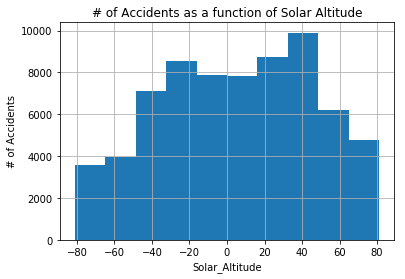

In [54]:
d_wssolschlmrks.hist('Solar_inclination', bins=10)
plt.xlabel('Solar_Altitude')
plt.ylabel('# of Accidents')
plt.title('# of Accidents as a function of Solar Altitude')
plt.savefig('Accident_Solar_inclination.pdf', bbox_inches='tight')

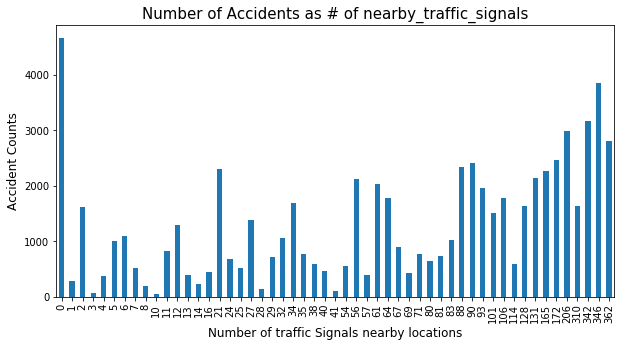

In [55]:
d_wssolschlmrks.groupby('Signals').sum()[
     'Accident'].plot('bar', figsize=(10, 5))
plt.xlabel('Number of traffic Signals nearby locations', fontsize=12)
plt.ylabel('Accident Counts', fontsize=12)
plt.title('Number of Accidents as # of nearby_traffic_signals', fontsize=15)
plt.savefig('Accident_TrafficSignal.pdf', bbox_inches='tight')

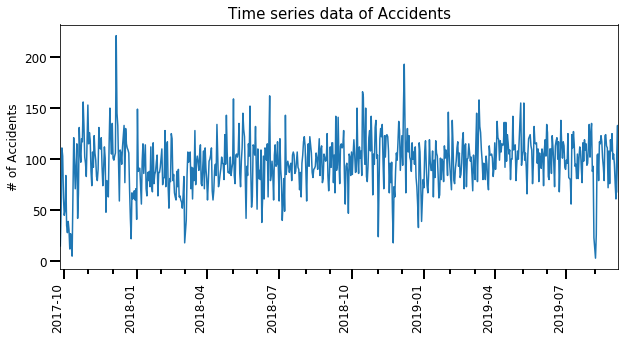

In [43]:
d_wssolschlmrks['Date'] = pd.to_datetime(
                         d_wssolschlmrks['Date']).dt.normalize()
ax = d_wssolschlmrks.groupby('Date').sum()['Accident'].plot(
     figsize=(10, 5), rot=90, fontsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
plt.xlabel('')
plt.ylabel('# of Accidents', fontsize=12)
plt.title('Time series data of Accidents', fontsize=15)
plt.tick_params(axis='both', which='major', length=10, width=2)
plt.tick_params(axis='both', which='minor', length=5, width=2)
plt.savefig('Time_series_accident.pdf', bbox_inches='tight')

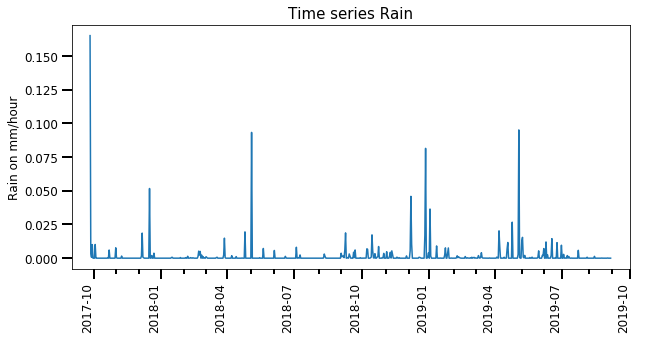

In [56]:
d_wssolschlmrks['Date'] = pd.to_datetime(
                          d_wssolschlmrks['Date']).dt.normalize()
ax = d_wssolschlmrks.groupby('Date').mean()['pcpt_mmph'].plot(
     figsize=(10, 5), rot=90, fontsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
plt.xlabel('')
plt.ylabel('Rain on mm/hour', fontsize=12)
plt.xlim('2017-09-01', '2019-10-01')
plt.title('Time series Rain', fontsize=15)
plt.tick_params(axis='both', which='major', length=10, width=2)
plt.tick_params(axis='both', which='minor', length=5, width=2)
plt.savefig('Time_series_Rain.pdf', bbox_inches='tight')


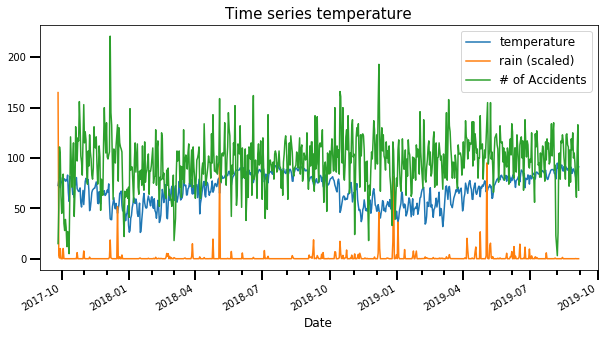

In [76]:
d_wssolschlmrks['raining'] = d_wssolschlmrks['pcpt_mmph'] * 1000
d_wssolschlmrks['Date'] = pd.to_datetime(
     d_wssolschlmrks['Date']).dt.normalize()
fig, ax = plt.subplots(figsize=(10, 5))
ax = d_wssolschlmrks.groupby('Date').mean()[
     'temperature'].plot(label='temperature')
     # figsize=(10, 5), rot=30, fontsize=12, label='temp')
ax = d_wssolschlmrks.groupby('Date').mean()[
     'raining'].plot(label='rain (scaled)')
     # figsize=(10, 5), rot=30, fontsize=12, label='rain')
ax = d_wssolschlmrks.groupby('Date').sum()[
     'Accident'].plot(label='# of Accidents')
     # figsize=(10, 5), rot=30, fontsize=12, label='Accident')
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
plt.xlabel('Date', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend(fontsize=12)
plt.xlim('2017-09-01', '2019-10-01')
plt.title('Time series temperature', fontsize=15)
plt.tick_params(axis='both', which='major', length=10, width=2)
plt.tick_params(axis='both', which='minor', length=5, width=2)
plt.savefig('Time_series_temp.pdf', bbox_inches='tight')

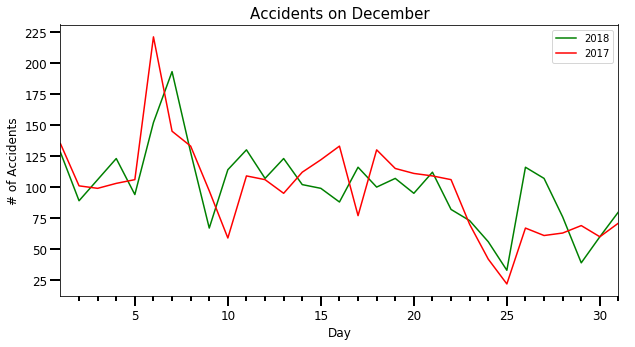

In [79]:
fig, ax = plt.subplots(figsize=(10, 5))
d_wssolschlmrks[(d_wssolschlmrks.year == 2018) & (
     d_wssolschlmrks.month == 12)].groupby(['day'])[
     'Accident'].sum().plot(color='green', ax=ax,
                            label='2018', legend=True, fontsize=12)
d_wssolschlmrks[(d_wssolschlmrks.year == 2017) & (
     d_wssolschlmrks.month == 12)].groupby(['day'])[
     'Accident'].sum().plot(color='red', ax=ax,
                            label='2017', legend=True, fontsize=12)
# d_wssolschlmrks[(d_wssolschlmrks.year == 2019) & (
     # d_wssolschlmrks.month==12)].groupby(['day'])[
     # 'Accident'].sum().plot(ax=ax,
                            # label='2019', legend=True, fontsize=20)
# df.groupby('country').plot(x='year', 
     # y='unemployment', ax=ax, legend=False)
# ax.legend(fontsize=12)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.xlabel('Day', fontsize=12)
plt.ylabel('# of Accidents', fontsize=12)
plt.title('Accidents on December', fontsize=15)
plt.tick_params(axis='both', which='major', length=10, width=2)
plt.tick_params(axis='both', which='minor', length=5, width=2)
plt.savefig('Time_series_Dec.pdf', bbox_inches='tight')

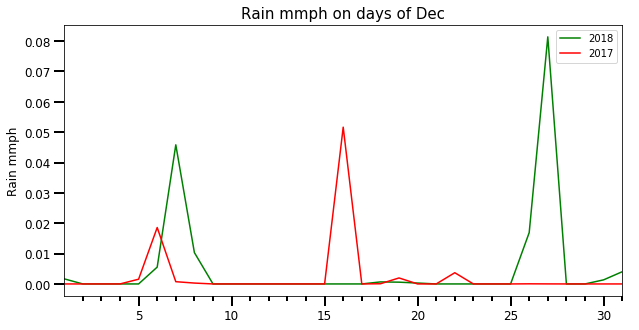

In [82]:
fig, ax = plt.subplots(figsize=(10, 5))
d_wssolschlmrks[(d_wssolschlmrks.year == 2018) & (
     d_wssolschlmrks.month == 12)].groupby(['day'])[
     'pcpt_mmph'].mean().plot(color='green', ax=ax,
                              label='2018', legend=True, fontsize=12)
d_wssolschlmrks[(d_wssolschlmrks.year == 2017) & (
     d_wssolschlmrks.month == 12)].groupby(['day'])[
     'pcpt_mmph'].mean().plot(color='red', ax=ax,
                              label='2017', legend=True, fontsize=12)
# d_wssolschlmrks[(d_wssolschlmrks.year == 2019) & (
     # d_wssolschlmrks.month == 12)].groupby(['day'])[
     # 'Accident'].sum().plot(ax=ax, label='2019', legend=True)
# df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.xlabel('')
plt.ylabel('Rain mmph', fontsize=12)
plt.title('Rain mmph on days of Dec', fontsize=15)
plt.tick_params(axis='both', which='major', length=10, width=2)
plt.tick_params(axis='both', which='minor', length=5, width=2)
plt.savefig('Rain_on_Dec.pdf', bbox_inches='tight')

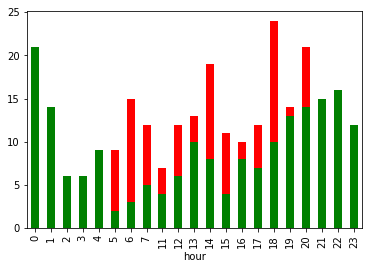

In [101]:
d_wssolschlmrks[(d_wssolschlmrks['Date'] == '2017-12-6') & (
     d_wssolschlmrks['Location'] == '(30.29011, -97.63516)')].groupby(
     'hour')['temperature'].plot(ax=ax, label='2017-12-6',
                                 color='red', legend=True)
d_wssolschlmrks[(d_wssolschlmrks['Date'] == '2018-12-7') & (
     d_wssolschlmrks['Location'] == '(30.29011, -97.63516)')].groupby(
     'hour')['temperature'].plot(ax=ax, label='2018-12-7',
                                 color='green', legend=True)
# d_wssolschlmrks[(d_wssolschlmrks.year == 2019) & (
     # d_wssolschlmrks.month == 12)].groupby(['day'])[
     # 'Accident'].sum().plot(ax=ax, label='2019', legend=True)
# df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)

dpts1 = d_wssolschlmrks[(d_wssolschlmrks['Date'] == '2017-12-6')][[
     'hour', 'temperature', 'Accident']]
dpts1.groupby('hour').sum()['Accident'].plot('bar', color='red')
dpts2 = d_wssolschlmrks[(d_wssolschlmrks['Date'] == '2018-12-7')][[
     'hour', 'temperature', 'Accident']]
dpts2.groupby('hour').sum()['Accident'].plot('bar', color='green')

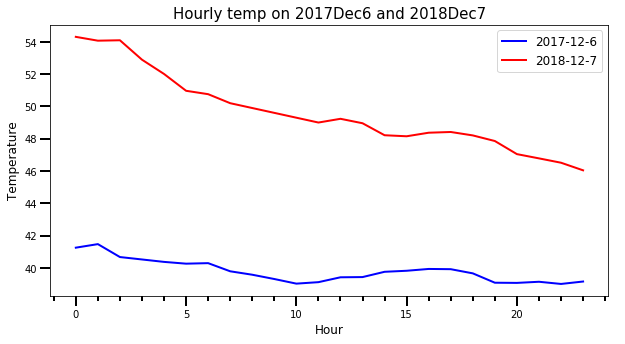

In [123]:
fig, ax = plt.subplots(figsize=(10, 5))
dps1 = dpts1.sort_values('hour').groupby('hour').mean().reset_index()
dps2 = dpts2.sort_values('hour').groupby('hour').mean().reset_index()
plt.plot(dps1.hour, dps1.temperature,
         label='2017-12-6', color='blue', linewidth=2)
plt.plot(dps2.hour, dps2.temperature,
         label='2018-12-7', color='red', linewidth=2)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.legend(fontsize=12)
plt.title('Hourly temp on 2017Dec6 and 2018Dec7', fontsize=15)
plt.tick_params(axis='both', which='major', length=10, width=2)
plt.tick_params(axis='both', which='minor', length=5, width=2)
plt.savefig('Hourly_onDate_temperature.pdf', bbox_inches='tight')

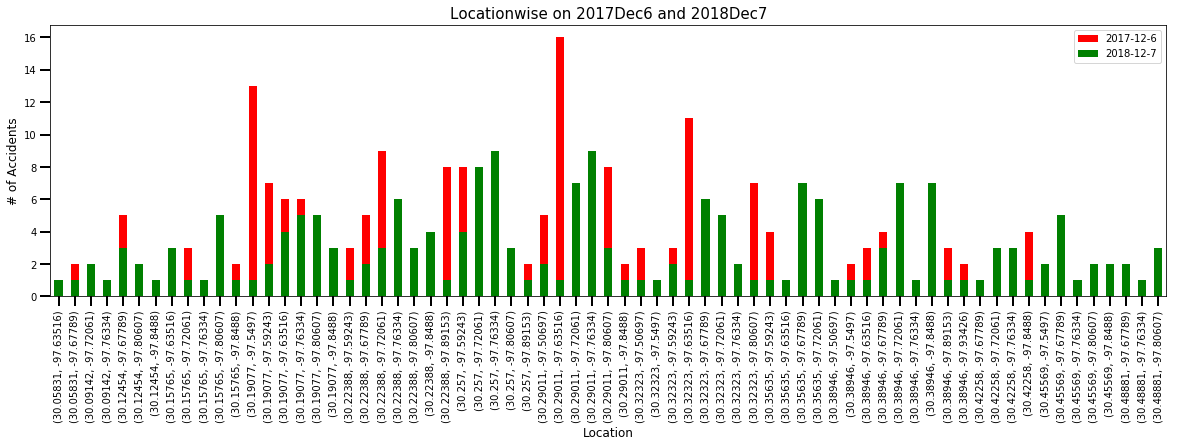

In [89]:
fig, ax = plt.subplots(figsize=(20, 5))
d_wssolschlmrks[(d_wssolschlmrks[
     'Date'] == '2017-12-6')].groupby(['Location'])[
     'Accident'].sum().plot('bar', ax=ax,
                            label='2017-12-6', color='red', legend=True)
d_wssolschlmrks[(d_wssolschlmrks[
     'Date'] == '2018-12-7')].groupby(['Location'])[
     'Accident'].sum().plot('bar', ax=ax,
                            label='2018-12-7', color='green', legend=True)
# d_wssolschlmrks[(d_wssolschlmrks.year == 2019)&(
     # d_wssolschlmrks.month == 12)].groupby(['day'])[
     # 'Accident'].sum().plot(ax=ax, label='2019', legend=True)
# df.groupby('country').plot(x='year', y='unemployment', ax=ax, legend=False)
ax.xaxis.set_minor_locator(AutoMinorLocator(1))
plt.xlabel('Location', fontsize=12)
plt.ylabel('# of Accidents', fontsize=12)
plt.title('Locationwise on 2017Dec6 and 2018Dec7', fontsize=15)
plt.tick_params(axis='both', which='major', length=10, width=2)
plt.tick_params(axis='both', which='minor', length=5, width=2)
plt.savefig('Locationwise_onDate_peak.pdf', bbox_inches='tight')

In [124]:
pd.get_dummies(d_wssolschlmrks['Issue Reported']).sum()  # .plot.barh()

COLLISION                      9588
COLLISION WITH INJURY          3011
COLLISION/PRIVATE PROPERTY      519
COLLISN / FTSRA                   1
COLLISN/ LVNG SCN              2013
Crash Service                 22500
Crash Urgent                  30429
FLEET ACC/ FATAL                  1
FLEET ACC/ INJURY                17
TRAFFIC FATALITY                 19
VEHICLE FIRE                    322
dtype: int64

In [125]:
d_wssolschlmrks.Location.head()

0    (30.22388, -97.8488)
1    (30.22388, -97.8488)
2    (30.22388, -97.8488)
3    (30.22388, -97.8488)
4    (30.22388, -97.8488)
Name: Location, dtype: object

In [126]:
Austin_coord = (30.25, -97.7)
sf_map = folium.Map(location=Austin_coord, zoom_start=10.499)
heatmap = plugins.HeatMap(d_wssolschlmrks[['Latitude', 'Longitude']], radius=8)
sf_map.add_child(heatmap)
# sf_map.save('data.html')

In [127]:
newcol = d_wssolschlmrks.Location.str.split('(', expand=True)[1].str.split(',', expand=True)
d_wssolschlmrks['lat'] = newcol[0].astype(float)
d_wssolschlmrks['lon'] = newcol[1].str.split(')', expand=True)[0].astype(float)

In [146]:
Austin_COORDINATES = (30.3, -97.7)
sf_map = folium.Map(location=Austin_COORDINATES, zoom_start=10.5)
heatmap = folium.plugins.HeatMap(d_wssolschlmrks[['lat', 'lon']], radius = 15)
sf_map.add_child(heatmap)

In [147]:
max(d_wssolschlmrks['Longitude']), min(d_wssolschlmrks['Longitude'])
max(d_wssolschlmrks['Latitude']), min(d_wssolschlmrks['Latitude'])

(30.6875, 30.025190000000002)

In [148]:
d_wssolschlmrks.groupby('Location').count();

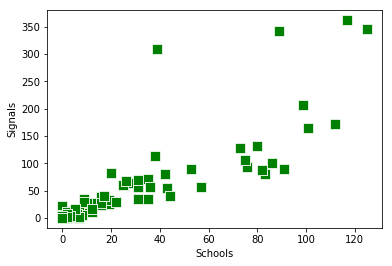

In [152]:
sns.scatterplot(data=d_wssolschlmrks,
                x='Schools', y='Signals', marker='s',
                color='green', s=100)

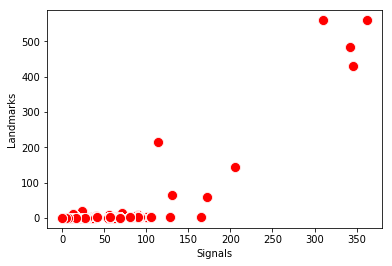

In [153]:
sns.scatterplot(data=d_wssolschlmrks,
                x='Signals', y='Landmarks',
                marker='o', s=100, color='red')

In [159]:
ac_levels = {'Issue Reported': {
             'Crash Urgent': 'Crash', 'Crash Service': 'Crash',
             'COLLISION/PRIVATE PROPERTY': 'Collision',
             'COLLISION': 'Collision', 'COLLISN/ LVNG SCN': 'Collision',
             'COLLISION WITH INJURY': 'Injury/Fatal',
             'FLEET ACC/ INJURY': 'Injury/Fatal',
             'VEHICLE FIRE': 'Injury/Fatal',
             'TRAFFIC FATALITY': 'Injury/Fatal',
             'COLLISN / FTSRA': 'Collision',
             'FLEET ACC/ FATAL': 'Injury/Fatal'}}

In [160]:
d_wssolschlmrks.replace(ac_levels, inplace=True)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


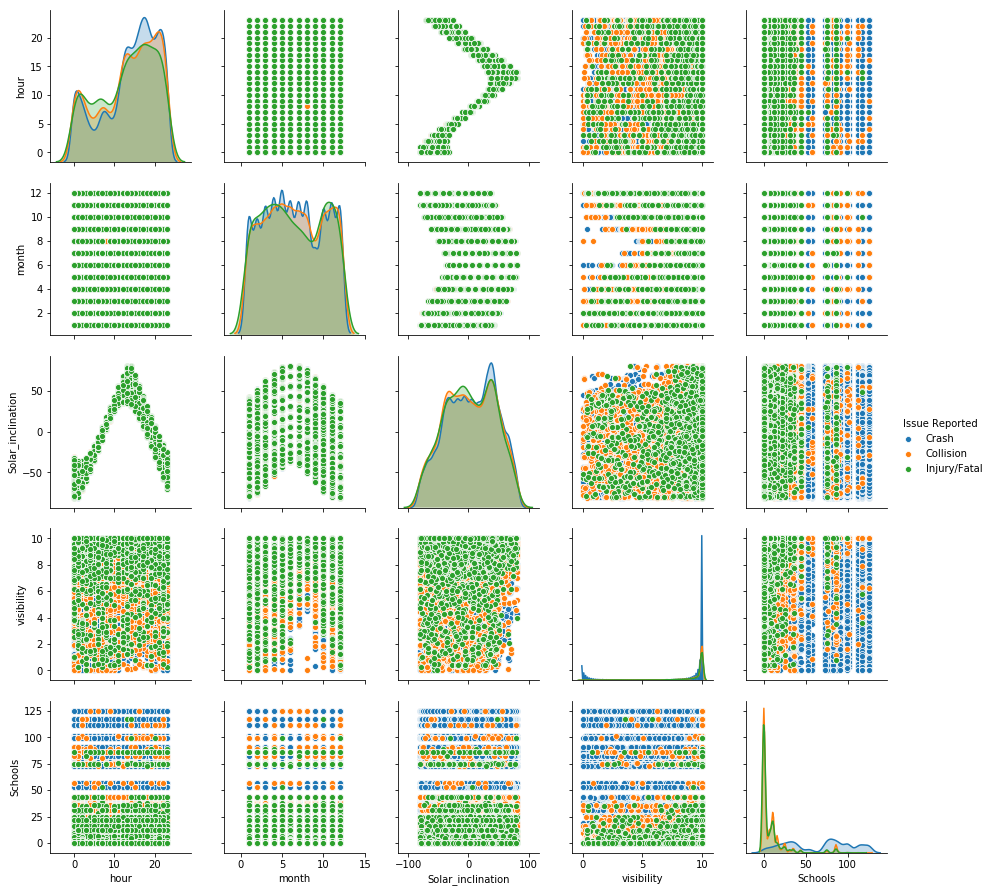

In [156]:
sns.pairplot(data=d_wssolschlmrks[['hour', 'month',
                                   'Solar_inclination', 'Issue Reported',
                                   'visibility', 'Schools']],
             hue='Issue Reported')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.savefig('PairPlot1.png', bbox_inches='tight')

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


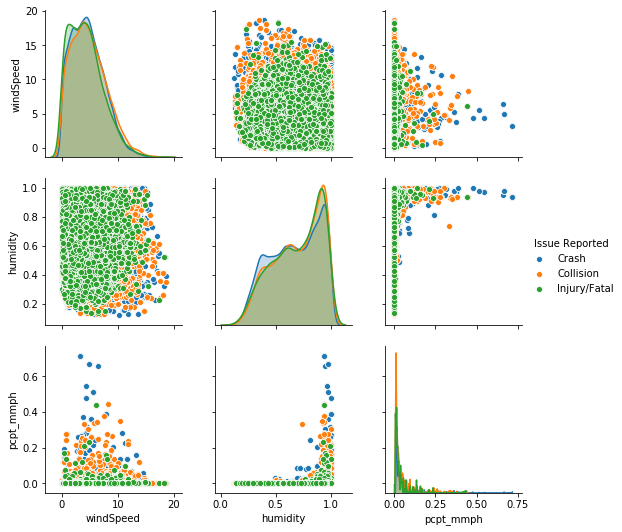

In [161]:
sns.pairplot(data=d_wssolschlmrks[['windSpeed',
                                   'Issue Reported',
                                   'humidity',
                                   'pcpt_mmph']],
             hue='Issue Reported')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.savefig('PairPlot2.png', bbox_inches='tight')

In [169]:
df_hour_list = []
sf_map1 = folium.Map(location=Austin_coord, zoom_start=10.499)
for hour in d_wssolschlmrks.hour.sort_values().unique():
    df_hour_list.append(d_wssolschlmrks.loc[
         d_wssolschlmrks.hour == hour, [
              'lat', 'lon', 'Accident']].groupby([
                     'lat', 'lon']).sum().reset_index().values.tolist())
plugins.HeatMapWithTime(
         df_hour_list, radius=8,
         gradient={0.2: 'blue', 0.6: 'green', 0.8: 'orange', 1: 'red'},
         min_opacity=0.5, max_opacity=1,
         use_local_extrema=True).add_to(sf_map1)